In [68]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler

In [69]:
# loading the dataset
dataset = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [70]:
# Checking for any null values or missing values in the dataset
dataset.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [71]:
# Checking what are the different possible values for the dependent variable y
dataset['DEATH_EVENT'].unique()

array([1, 0])

In [72]:
### splitting the dataset into dependent and independent features

# X = independent features = storing all features excluding the last one i.e DEATH_EVENT
X = dataset.iloc[:,:-1]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [73]:
# y =  storing only the last feature --> DEATH_EVENT
y = dataset.iloc[:,-1]
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


**VISUALIZATION**

<ipython-input-74-bdae255e271d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-74-bdae255e271d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-74-bdae255e271d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-74-bdae255e271d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-74-bdae255e271d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-74-bdae255e271d>:7: 

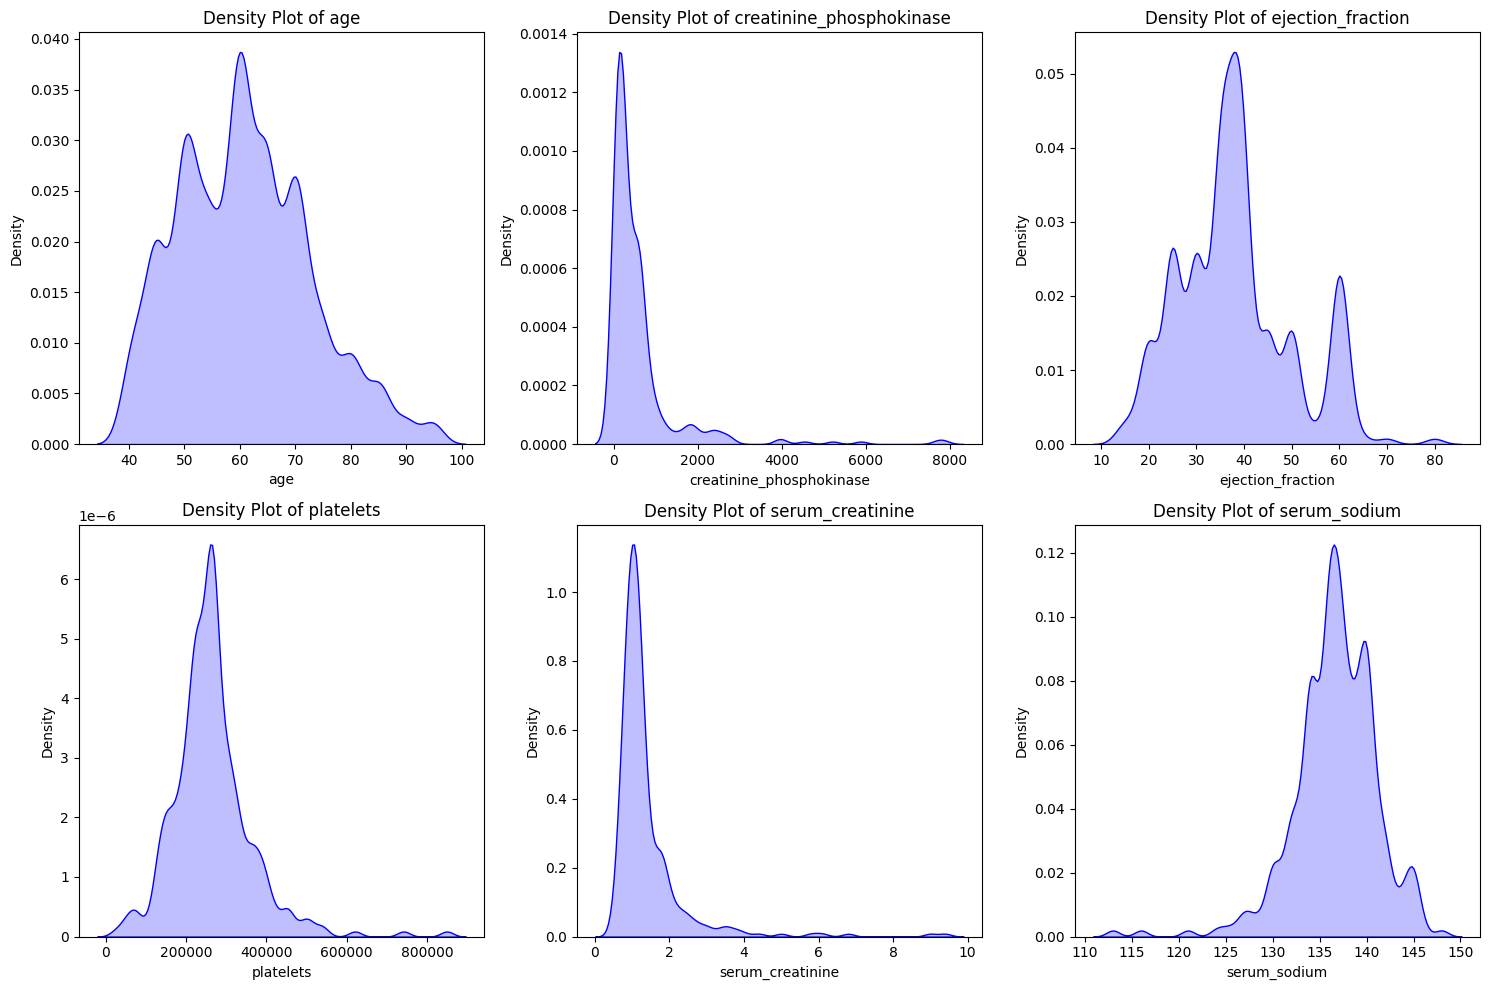

In [74]:

numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(15, 10))

# Density plot for each continuous feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(dataset[col], shade=True, color="blue", bw_adjust=0.5)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [75]:
features = ['age','ejection_fraction']

for feature in features:

    surv = dataset[dataset["DEATH_EVENT"] == 0][feature]
    not_surv = dataset[dataset["DEATH_EVENT"] == 1][feature]


    hist_data = [surv, not_surv]
    group_labels = ['Survived', 'Not Survived']


    fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)


    fig.update_layout(
        title_text=f"Distribution of {feature} based on Survival Status",
        xaxis_title=feature,
        yaxis_title="Density",
        template='plotly_white'
    )


    fig.show()

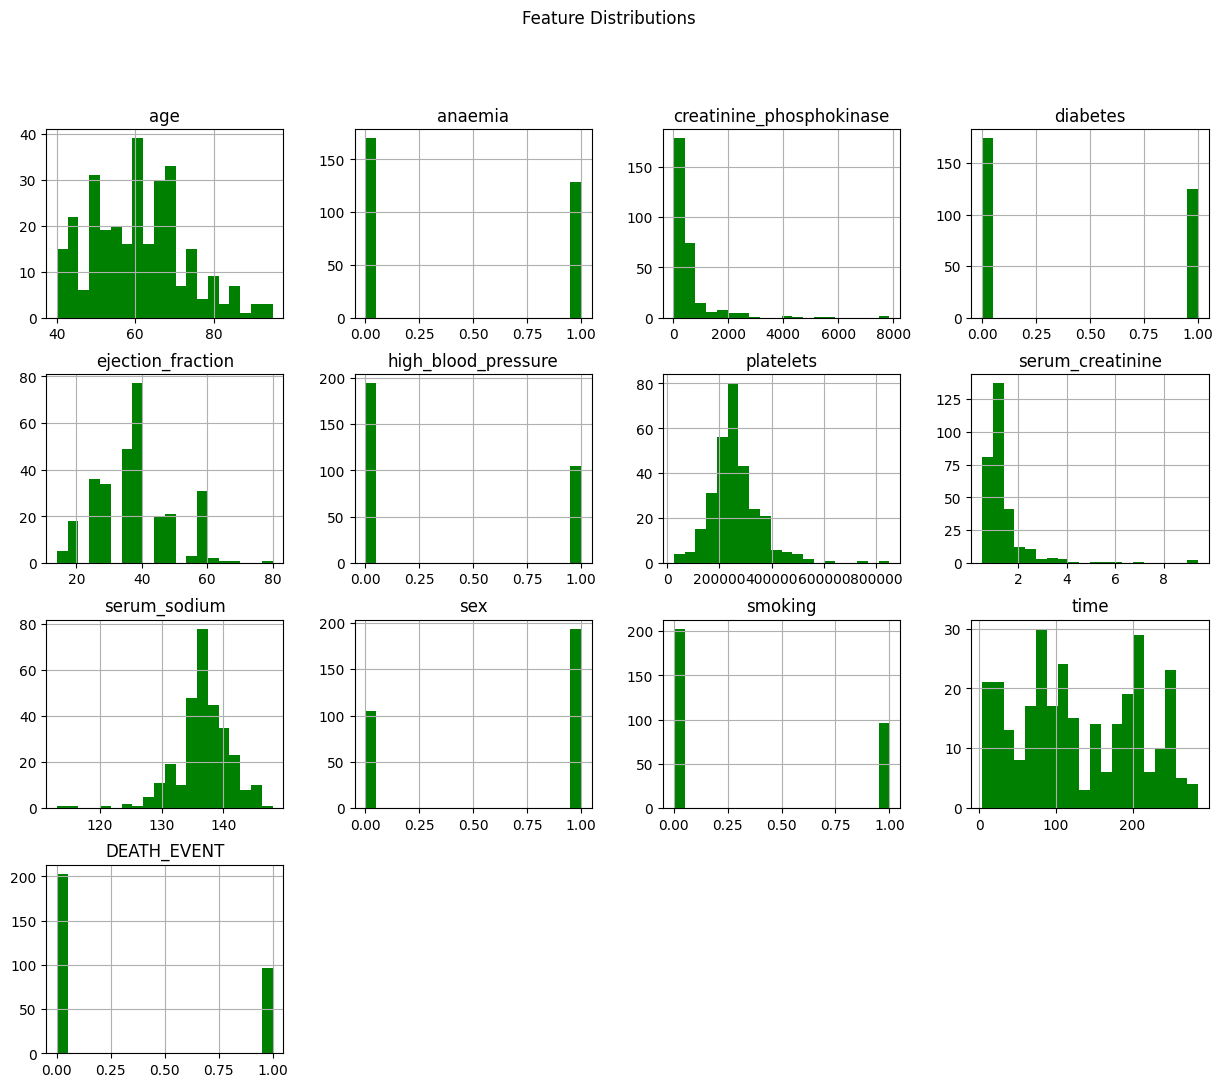

In [76]:
dataset.hist(figsize=(15, 12), bins=20 , color = 'green')
plt.suptitle('Feature Distributions')
plt.show()

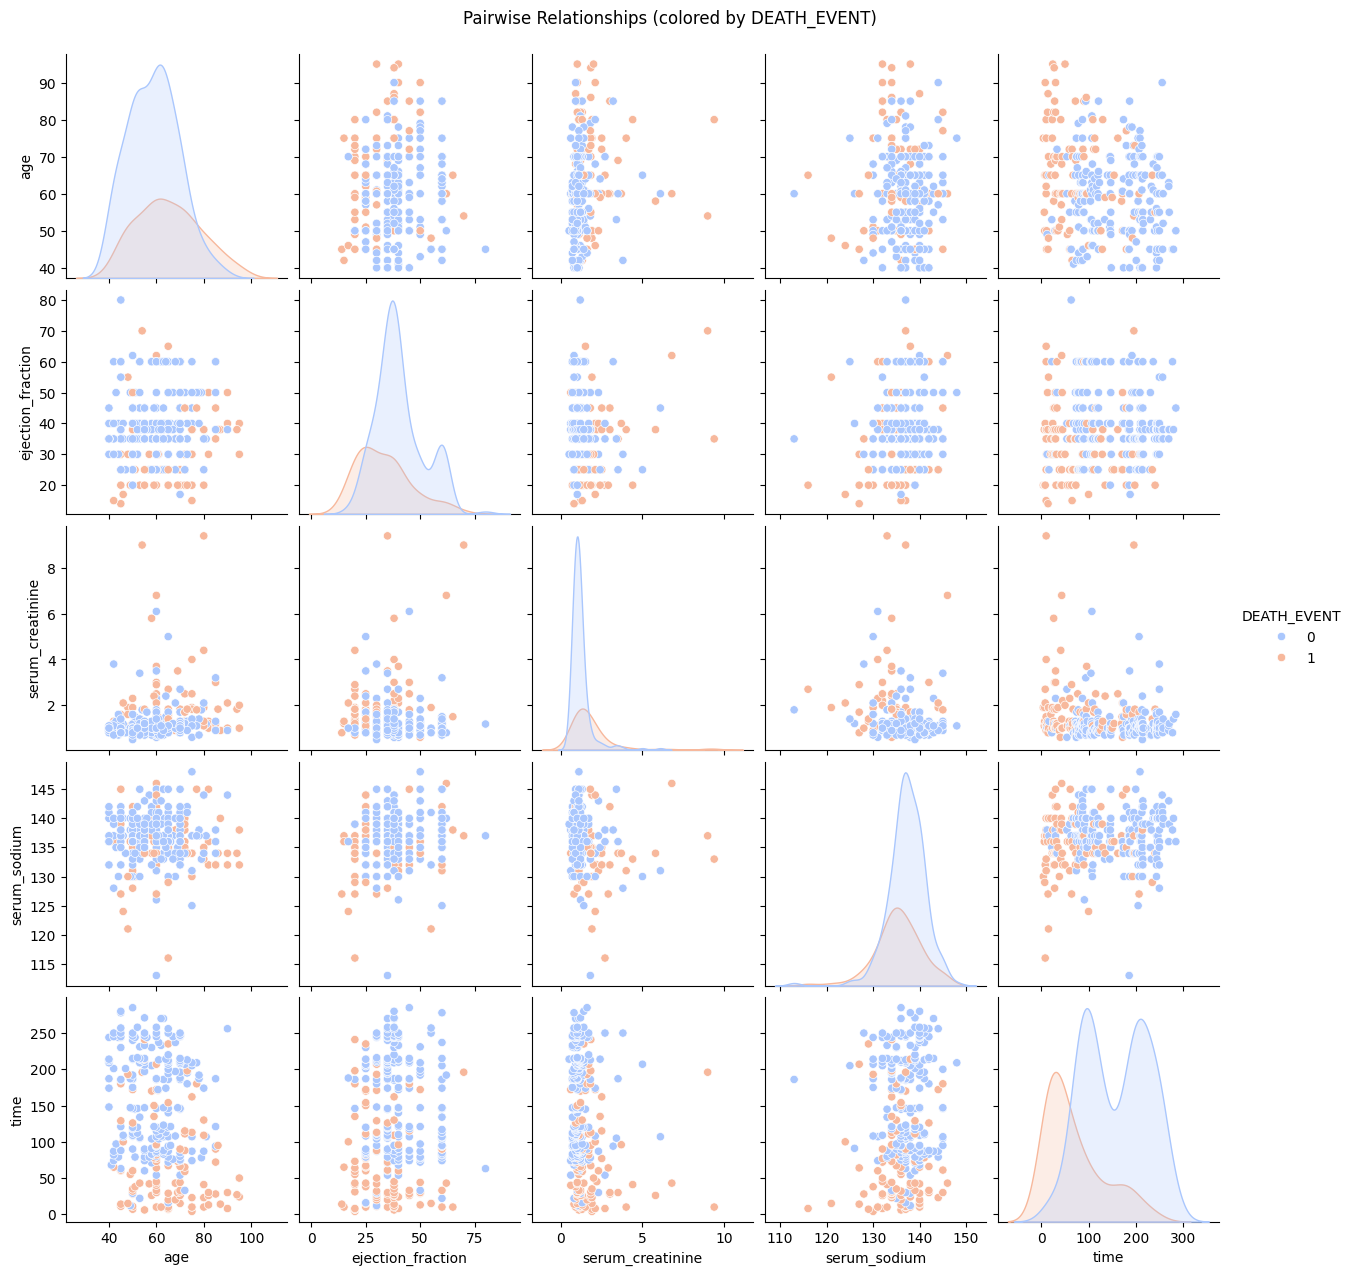

In [77]:
subset_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']

sns.pairplot(dataset[subset_features], hue='DEATH_EVENT', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairwise Relationships (colored by DEATH_EVENT)', y=1.02)
plt.show()

<ipython-input-78-8a553f5bb063>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-8a553f5bb063>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-8a553f5bb063>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-8a553f5bb063>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-8a553f5bb063>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

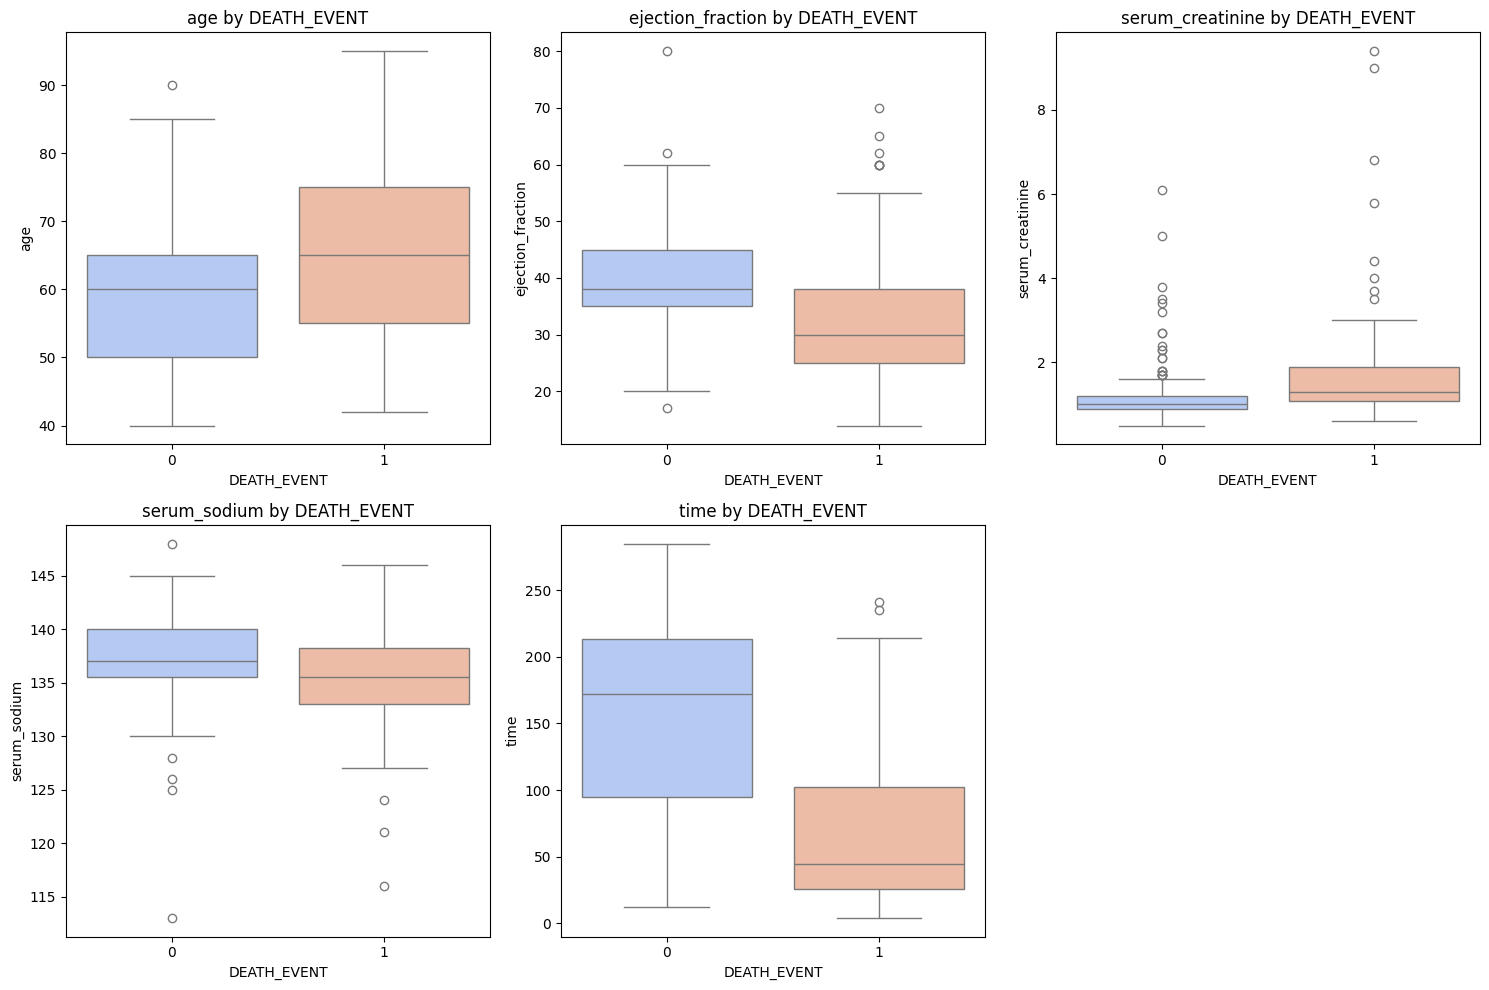

In [78]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(subset_features[:-1], 1):  # Exclude the target itself
    plt.subplot(2, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=col, data=dataset, palette='coolwarm')
    plt.title(f'{col} by DEATH_EVENT')

plt.tight_layout()
plt.show()

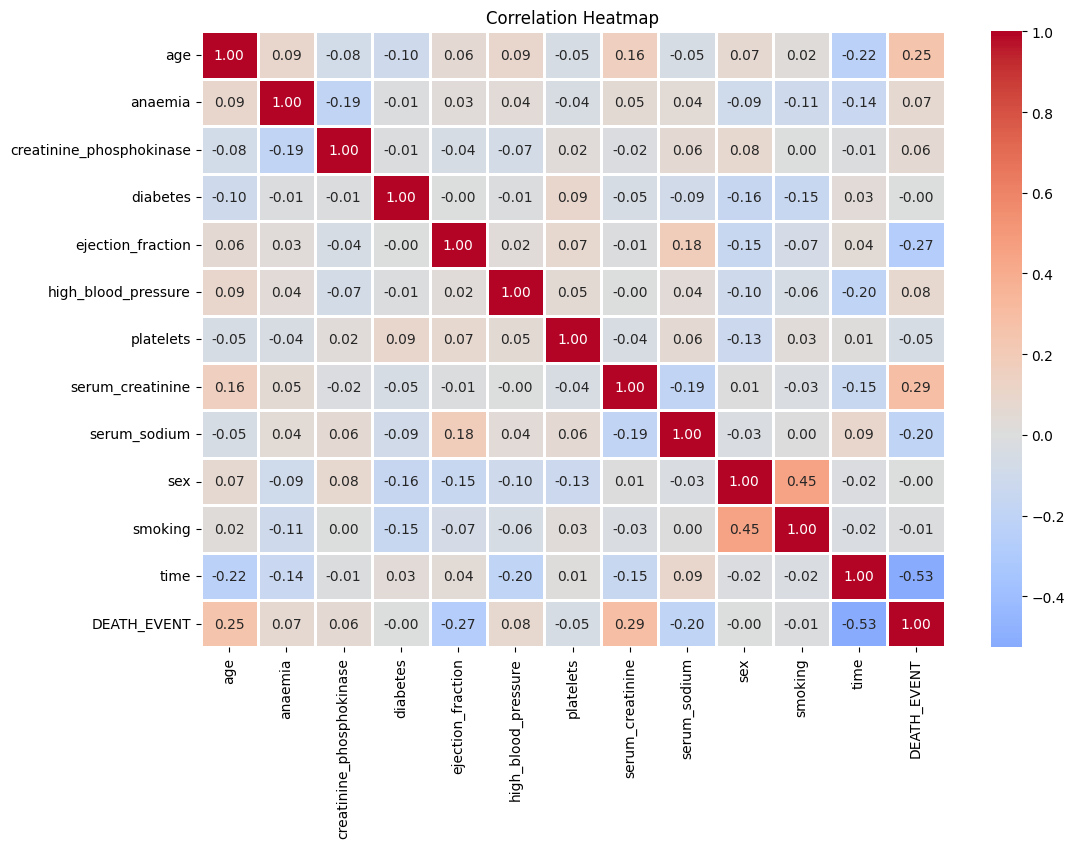

In [79]:
corr_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Correlation of features with DEATH_EVENT:
age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


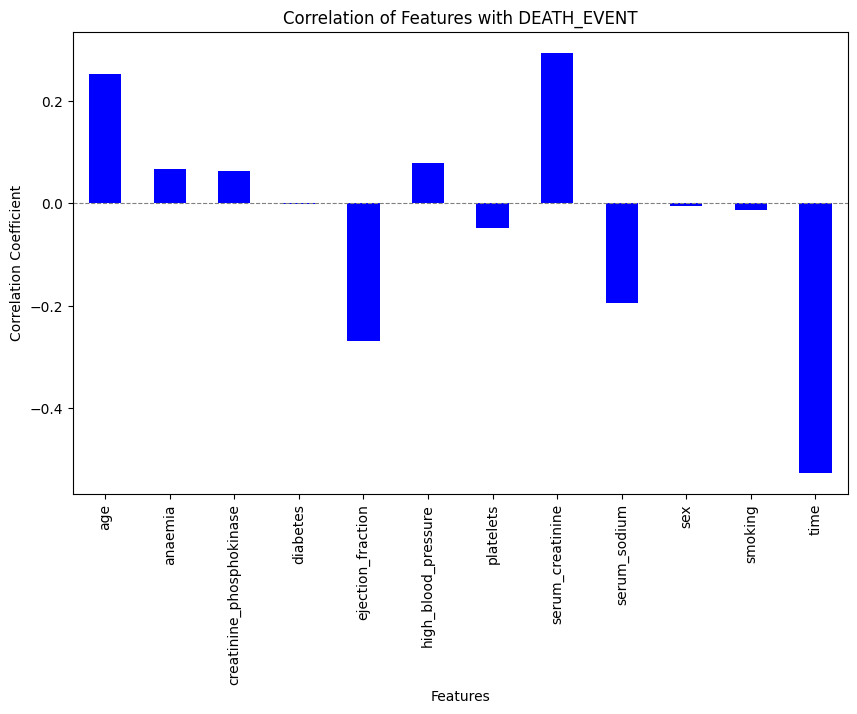

In [80]:
correlation_target = dataset.corr()['DEATH_EVENT'].drop('DEATH_EVENT')
print("Correlation of features with DEATH_EVENT:")
print(correlation_target)

plt.figure(figsize=(10, 6))
correlation_target.plot(kind='bar', color='blue')
plt.title('Correlation of Features with DEATH_EVENT')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linewidth=0.8, ls='--')
plt.show()

<ipython-input-81-d210f37270f4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




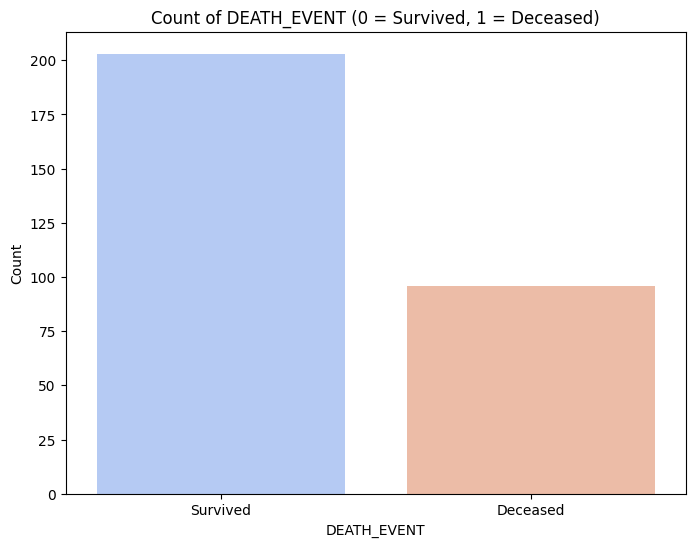

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', data=dataset, palette='coolwarm')
plt.title('Count of DEATH_EVENT (0 = Survived, 1 = Deceased)')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Deceased'])
plt.show()

In [82]:
!pip install lifelines

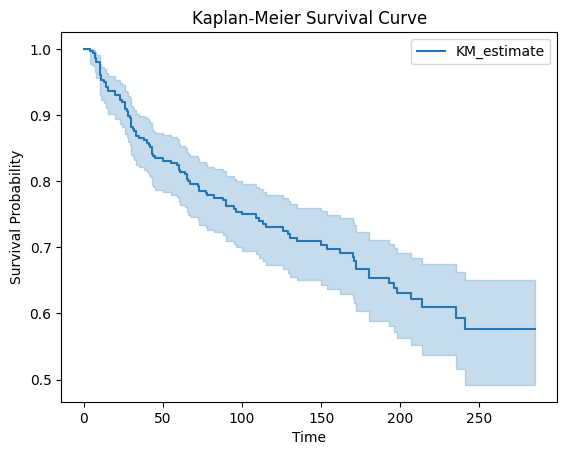

In [83]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(dataset['time'], event_observed=dataset['DEATH_EVENT'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

**NORMALIZATION**

In [84]:
# normalization
from sklearn.preprocessing import MinMaxScaler

# Data Normalization for numerical features
scaler = MinMaxScaler()

# Apply MinMaxScaler to numerical columns
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
print("Data after normalization:")
print(dataset.head())

Data after normalization:
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364        0                  0.071319         0           0.090909   
1  0.272727        0                  1.000000         0           0.363636   
2  0.454545        0                  0.015693         0           0.090909   
3  0.181818        1                  0.011227         0           0.090909   
4  0.454545        1                  0.017479         1           0.090909   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1   0.290823          0.157303      0.485714    1   
1                    0   0.288833          0.067416      0.657143    1   
2                    0   0.165960          0.089888      0.457143    1   
3                    0   0.224148          0.157303      0.685714    1   
4                    0   0.365984          0.247191      0.085714    0   

   smoking  time  DEATH_EVENT  
0        0     4      

***USING LOGISTIC REGRESSION***

In [85]:
# //// USING LOGISTIC REGRESSION ////
from sklearn.linear_model import LogisticRegression
classifier  = LogisticRegression()

In [86]:
#  test_size = 0.33 ---> using 33% of the data for testing and the remaing 67% for training
#  random_state = 42 ---> we can use any number, but generally 42 is used. It controls the randomness to ensure the results are the same every time we run the code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [87]:
# GridSearch = algorithm that finds the best model by trying every possible combination of hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = {'penalty' : ['l1','l2','elasticnet'], 'C' : [1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300,400,500]}

In [88]:
classifier_Regressor = GridSearchCV(classifier,param_grid = parameters,scoring='accuracy',cv = 5 )

In [89]:
classifier_Regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [90]:
print(classifier_Regressor.best_params_)

{'C': 10, 'max_iter': 200, 'penalty': 'l2'}


In [91]:
print(classifier_Regressor.best_score_)

0.8400000000000001


In [92]:
# prediction
y_pred = classifier_Regressor.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [93]:
# accuracy
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred, y_test)
print(score)

0.797979797979798


In [94]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[53,  4],
       [16, 26]])

In [95]:
print(classification_report(y_test,y_pred))
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("specificity : " ,  specificity)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: " , accuracy)


# LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        57
           1       0.87      0.62      0.72        42

    accuracy                           0.80        99
   macro avg       0.82      0.77      0.78        99
weighted avg       0.81      0.80      0.79        99

specificity :  0.9298245614035088
Accuracy:  0.797979797979798


In [96]:
# Assuming y_test and y_pred are defined, and y_pred_prob contains predicted probabilities
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)
# logistic

Accuracy: 0.797979797979798
Precision: 0.8666666666666667
Recall: 0.6190476190476191
F1 Score: 0.7222222222222222
ROC AUC: 0.7744360902255639


Logistic regression


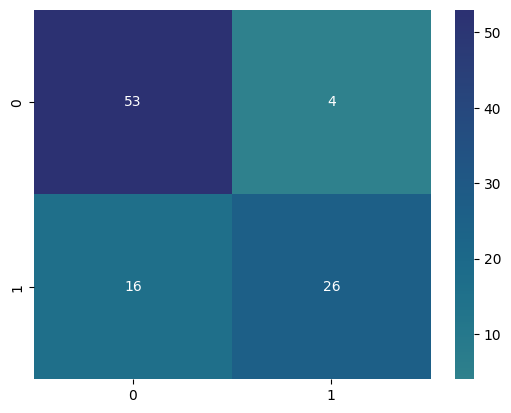

In [119]:
#  visualization
# plot the confusion matrix using seaborn library
sns.heatmap(cm, vmin=None, vmax=None, cmap="crest", center=True , annot=True, fmt='.2g')
print("Logistic regression")

*USING SUPPORT VECTOR MACHINE*

In [98]:
# svm
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [99]:
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear']
}

# grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=2)
# grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)

In [100]:
# Create a new SVM classifier with the best parameters
svm_best_model = SVC(
    C=1.0,
    kernel='linear',
    random_state=42
)

In [101]:
# Fit the new model to the training data
svm_best_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [102]:
# Fit the new model to the training data
svm_best_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Confusion Matrix:
[[54  3]
 [17 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        57
           1       0.89      0.60      0.71        42

    accuracy                           0.80        99
   macro avg       0.83      0.77      0.78        99
weighted avg       0.82      0.80      0.79        99


Specificity :  0.9298245614035088
Accuracy:  0.797979797979798


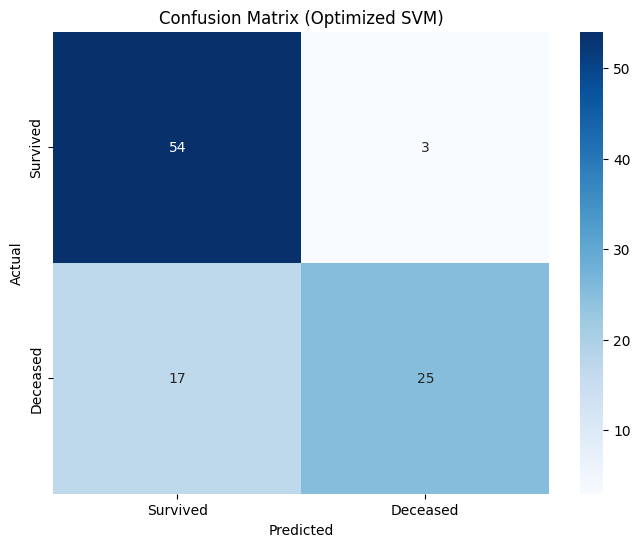

In [103]:
y_pred_best = svm_best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("\nSpecificity : " , specificity)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: " , accuracy)
# visualization

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Deceased'], yticklabels=['Survived', 'Deceased'])
plt.title('Confusion Matrix (Optimized SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# svm

In [104]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)
# svm

Accuracy: 0.797979797979798
Precision: 0.8666666666666667
Recall: 0.6190476190476191
F1 Score: 0.7222222222222222
ROC AUC: 0.7744360902255639


*USING DECISION TREE*

In [105]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()


In [106]:
#Training the decision tree classifier.
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
#Predicting labels on the test set.
y_pred = clf.predict(X_test)

In [108]:
#max depth and minSample split prevents overfitting

model1 = DecisionTreeClassifier(min_samples_split=10)
model1.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6767676767676768

In [109]:
from graphviz import Source
from sklearn import tree

feature_names = dataset.columns.tolist()
feature_names.remove('DEATH_EVENT')

In [110]:
dot_data = tree.export_graphviz(model1, feature_names=feature_names, filled=True,
                                class_names=['0', '1'], out_file=None)
graph = Source(dot_data)
graph.render("First_tree", view=True)

'First_tree.pdf'

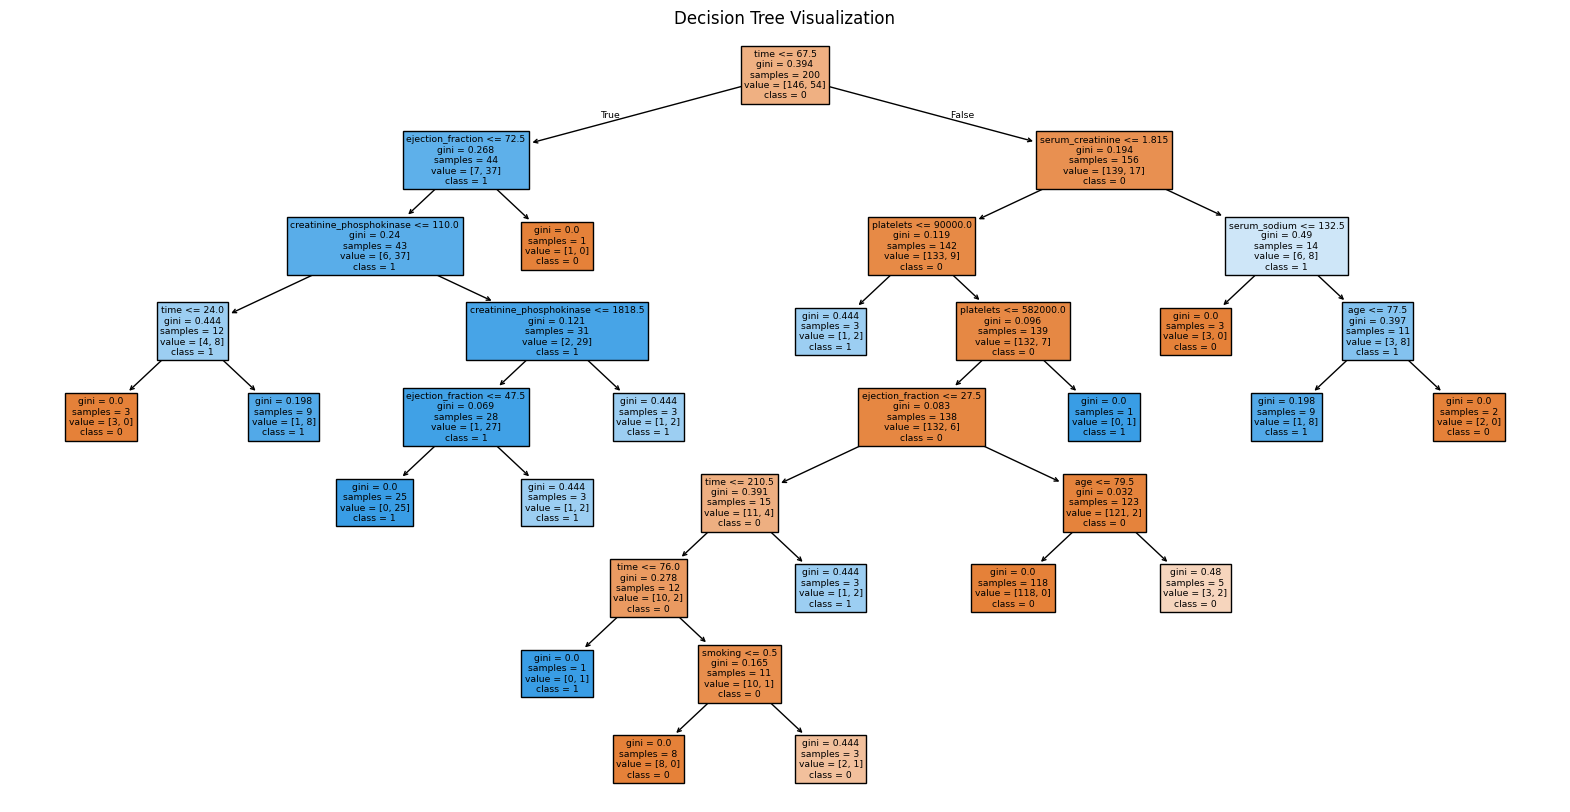

In [111]:
# evaluating the model
plt.figure(figsize=(20,10))
tree.plot_tree(model1, feature_names=X.columns, class_names=['0', '1'], filled=True)  # Use 'model1' and correct class names
plt.title("Decision Tree Visualization")
plt.show()

In [112]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("\nSpecificity : " , specificity)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: " , accuracy)
# decision tree


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        57
           1       0.89      0.60      0.71        42

    accuracy                           0.80        99
   macro avg       0.83      0.77      0.78        99
weighted avg       0.82      0.80      0.79        99


Specificity :  0.9298245614035088
Accuracy:  0.797979797979798


In [113]:
#Exploratory Data Analysis
#correlation
dataset.corr()# by default by pearson method checks the correlation btwn X&Y

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


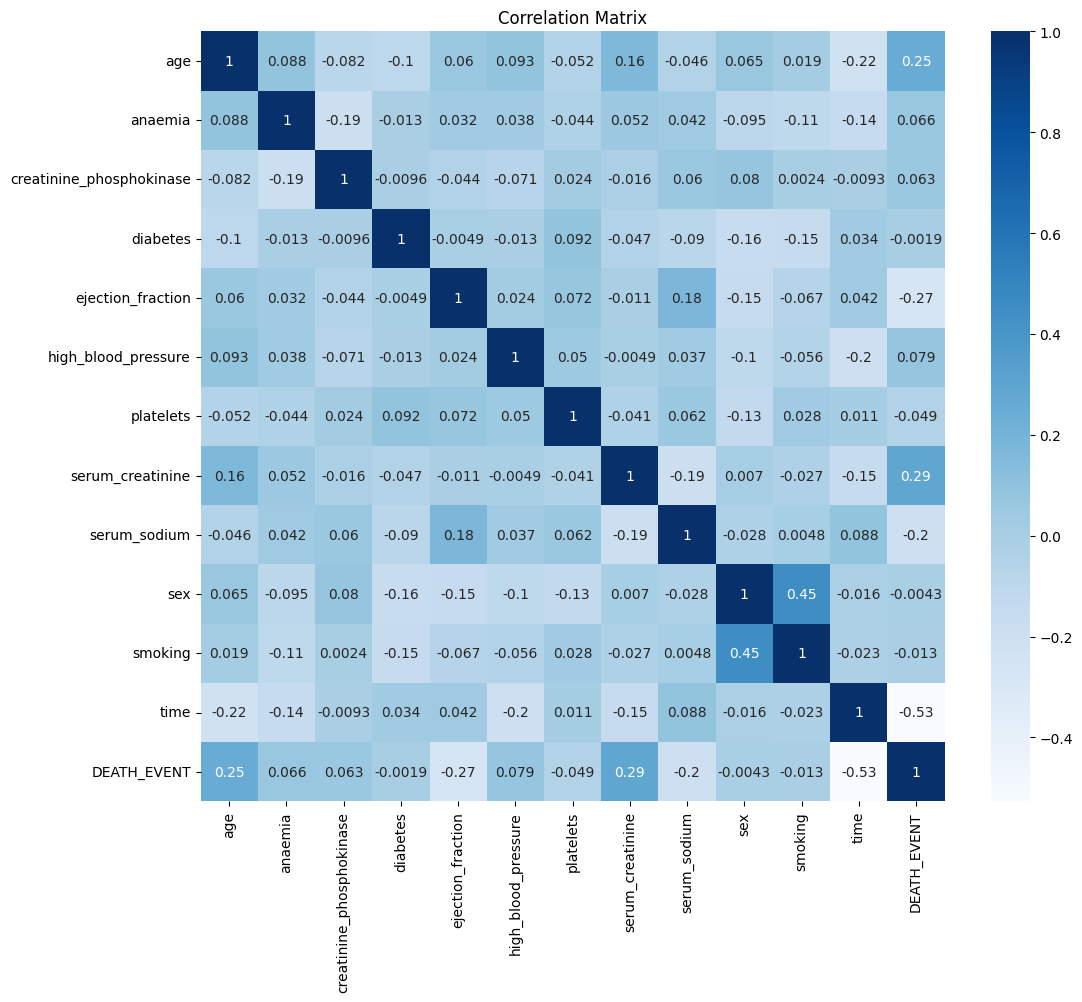

In [114]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)
# decision tree

Accuracy: 0.6767676767676768
Precision: 0.6470588235294118
Recall: 0.5238095238095238
F1 Score: 0.5789473684210527
ROC AUC: 0.656641604010025


ROC curve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



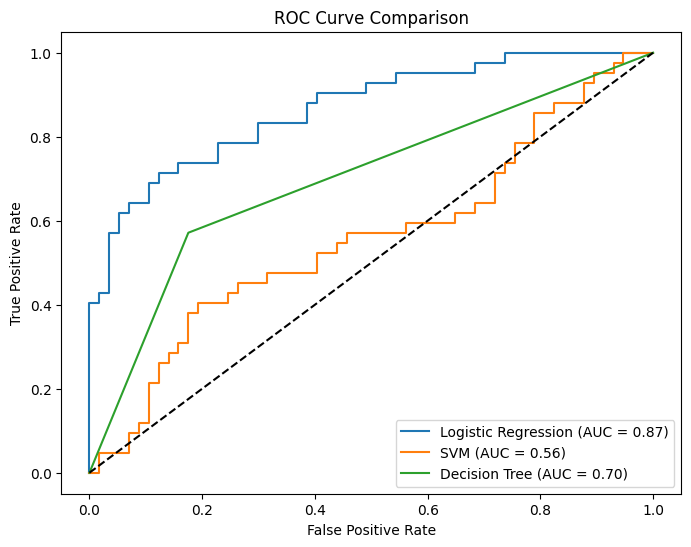

In [118]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize classifiers
svm_classifier = SVC(probability=True)  # Set probability=True to use predict_proba
dt_classifier = DecisionTreeClassifier()
classifier_Regressor = LogisticRegression()  # Assuming logistic regression is also imported

# Fit classifiers (replace X_train, y_train with your training data)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
classifier_Regressor.fit(X_train, y_train)

# Logistic Regression ROC
y_pred_proba_lr = classifier_Regressor.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# SVM ROC
y_pred_proba_svm = svm_classifier.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Decision Tree ROC
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(auc_lr))
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.2f})".format(auc_svm))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(auc_dt))

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
